1. data ingestion 
2. data  processing 
    - check null
    - check duplicate value
    - check data type
    - drop unwanted data
    - fill null value
    - data normalization/scaling (transform data)
    - create new data
    - check outliers
3.  data analysis 
- descriptive statistics
    - univariante
    - 
- correlation analysis
    - bivariant 
    - multivariant



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df =pd.read_csv("Car_sales.csv")

In [3]:
### Shape of the dataset
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
# no rows, cols 
df.shape

(157, 16)

In [6]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

## check null and clean


In [7]:
df.isnull().sum() 

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
# drop dupplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df.dropna()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [10]:
df["__year_resale_value"]

0      16.360
1      19.875
2      18.225
3      29.725
4      22.255
        ...  
152       NaN
153       NaN
154       NaN
155       NaN
156       NaN
Name: __year_resale_value, Length: 157, dtype: float64

In [11]:
# fill the null value of __year_resale_value
df.drop("__year_resale_value",axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


In [12]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [15]:
# fillna 
df["wj"] = df["wj"].fillna(df["wj"].mean())


KeyError: 'wj'

In [ ]:
# Analysis 
# - univariante
# - bivariante .corr
# - multivariante  .corr// heatmap

In [ ]:
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
# total unique values
# ttoal unique values
# total vaules
# Manufacturer wise  total 
df["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
df["Manufacturer"].nunique()

30

In [ ]:
df["Manufacturer"].groupby(by=df["Manufacturer"]).count()

pandas.core.series.Series

In [ ]:
df["Manufacturer"].groupby(by=df["Manufacturer"]).count().sort_values(ascending=False)

Manufacturer
Ford          11
Dodge         10
Chevrolet      9
Mercedes-B     9
Toyota         9
Nissan         7
Mitsubishi     7
Pontiac        6
Volkswagen     6
Mercury        6
Lexus          6
Chrysler       6
Volvo          6
Honda          5
Oldsmobile     5
Saturn         5
Buick          4
Plymouth       4
Cadillac       4
Audi           3
BMW            3
Acura          3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [ ]:
# data distibution 
plt.hist(x=df["Manufacturer"])


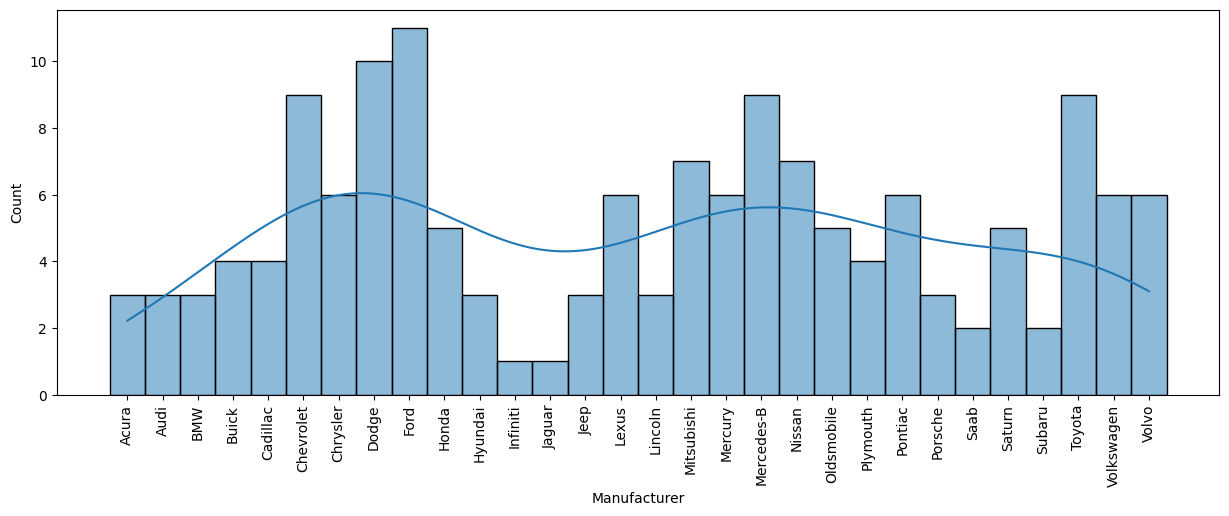

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Manufacturer"],kde=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

In [ ]:
# show the avg price of Manufacturer
avg_price = df[["Manufacturer","Price_in_thousands"]].groupby("Manufacturer",as_index=False).mean("Price_in_thousands")
avg_price

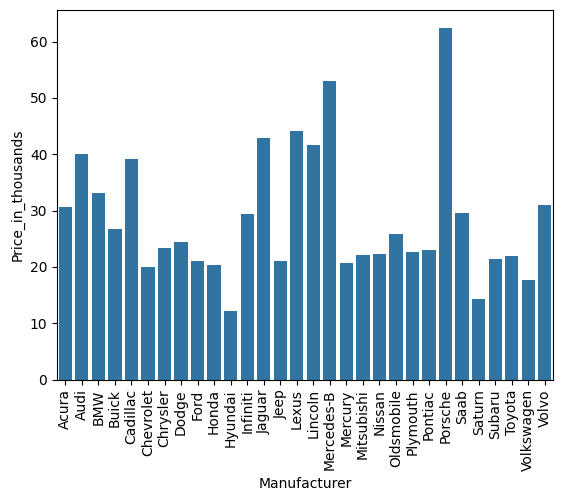

In [50]:
sns.barplot(x=avg_price["Manufacturer"],y=avg_price["Price_in_thousands"])
plt.xticks(rotation=90)
plt.show()

In [67]:

vehicle_count = df['Vehicle_type'].value_counts()
vehicle_count

Vehicle_type
Passenger    112
Car           40
Name: count, dtype: int64

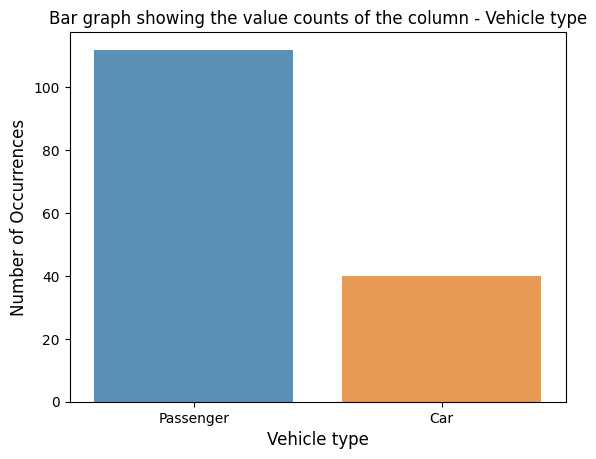

In [68]:
### Bar graph showing the value counts of the column - Vehicle_type

sns.barplot(x=vehicle_count.index, y=vehicle_count.values, alpha = 0.8,hue=vehicle_count.index)
plt.title('Bar graph showing the value counts of the column - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()

In [53]:
df["Vehicle_type"].unique()

array(['Passenger', 'Car'], dtype=object)

In [74]:
# categorical columns
# total sales count in each vehicle types 
df2 = df["Vehicle_type"].value_counts()
df2
# total sales amount in each types
# type(df2)

Vehicle_type
Passenger    112
Car           40
Name: count, dtype: int64

<Axes: xlabel='Vehicle_type'>

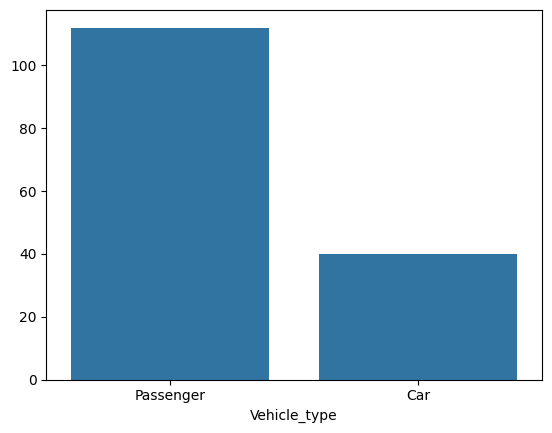

In [72]:
sns.barplot(x=df2.index, y=df2.values)

In [75]:
# total sales by vechles types
df[["Vehicle_type","Price_in_thousands"]].groupby("Vehicle_type",as_index=False).sum()

,Vehicle_type,Price_in_thousands
0,Car,1052.799
1,Passenger,3101.638


### Insights
- passeger vehicles sales are 3x of car
- we more focus car sales 

### number data types

In [76]:
df.dtypes

Manufacturer           object
Model                  object
Sales_in_thousands    float64
Vehicle_type           object
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Latest_Launch          object
Power_perf_factor     float64
dtype: object

In [78]:
# total, avg, max ,min , percentile, median , 
# distributions, outliers,
df.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,53.359072,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,76.704153
std,68.938380,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,25.180983
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.714000,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,59.755537
50%,29.213000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,71.514623
75%,68.069750,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,89.408406
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


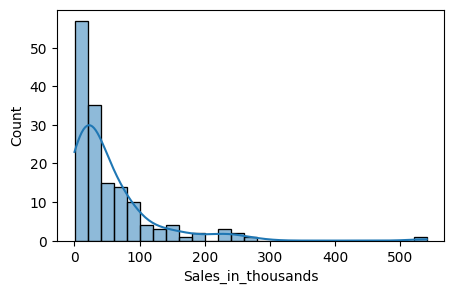

In [82]:
plt.figure(figsize=(5,3))
sns.histplot(x=df["Sales_in_thousands"] ,kde=True)
plt.show()

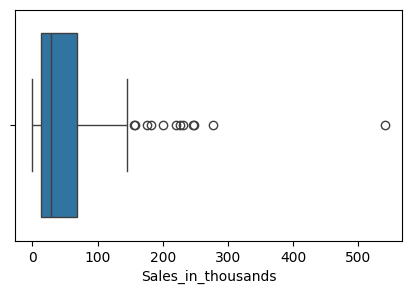

In [84]:
# outliers
plt.figure(figsize=(5,3))
sns.boxplot(x=df["Sales_in_thousands"])
plt.show()

In [87]:
q1 = df["Sales_in_thousands"].quantile(.25)
q3 = df["Sales_in_thousands"].quantile(.75)

In [88]:
iqr = q3-q1
iqr

np.float64(54.35575)

In [121]:
lower_fench = q1 - .05*iqr
upper_fench = q3 + 5*iqr

In [122]:
lower_fench

np.float64(10.9962125)

In [123]:
upper_fench

np.float64(339.8485)

In [139]:
df["Price_in_thousands"][df["Price_in_thousands"]< upper_fench]

0      21.50
1      28.40
3      42.00
4      23.99
5      33.95
       ...  
152    24.40
153    27.50
154    28.80
155    45.50
156    36.00
Name: Price_in_thousands, Length: 152, dtype: float64

In [ ]:
df["Sales_in_thousands"][(df["Sales_in_thousands"]> lower_fench) & (df["Sales_in_thousands"]<upper_fench)]

In [140]:
df["clean_price"] = df["Sales_in_thousands"][(df["Sales_in_thousands"]> lower_fench) & (df["Sales_in_thousands"]<upper_fench)]

<Axes: xlabel='clean_price'>

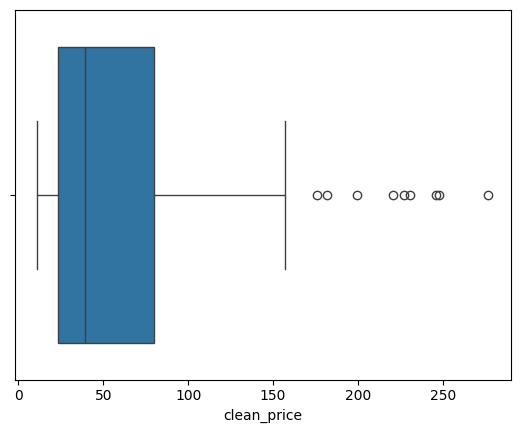

In [141]:
sns.boxplot(x=df["clean_price"])